# Dataset2 Bank Product Sales Forecast
## Import Required Packages

In [90]:
import pandas as pd
import numpy as np

import seaborn as sns # boxplot, histplot
import matplotlib.pyplot as plt # plot

from sklearn.feature_selection import SelectPercentile # Feature Selection
from sklearn.feature_selection import f_regression # for linear regression

from sklearn import preprocessing # Scaling IV Normalisition
from sklearn.preprocessing import StandardScaler # Scaling IV Standardising

from sklearn import decomposition # Principal Component Analysis
from sklearn import tree

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.neighbors import KNeighborsClassifier # KNN

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Load Data

https://mymoodle.ncirl.ie/pluginfile.php/45006/mod_resource/content/1/65y_Bank.CSV

In [2]:
#Load Data In Pandas
df = pd.read_csv('Bank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Data Preprocess
### Drop rows with missing values

In [3]:
# Drop rows with missing values NaN
df.dropna()
df.info() # there is no change at this stage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Detect Duplicated Rows and Drop Duplicates

In [4]:
df.duplicated(df,keep=False)
df.drop_duplicates(df,keep=False)
df.info() # No Duplicated Rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Dealing with Categorical Data

In [5]:
# Convert categorical string values into integers
for colname in df.loc[:, df.dtypes == object]:
    print(colname,': ',df[colname].unique())

job :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital :  ['married' 'single' 'divorced']
education :  ['tertiary' 'secondary' 'unknown' 'primary']
default :  ['no' 'yes']
housing :  ['yes' 'no']
loan :  ['no' 'yes']
contact :  ['unknown' 'cellular' 'telephone']
month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome :  ['unknown' 'failure' 'other' 'success']
y :  ['no' 'yes']


In [6]:
# Change all columns with values only 'yes' or 'no' to 1 and 0 respectively
yes_no_mapping={'yes': 1, 'no': 0}
#month_mapping ={'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
                #'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
                #'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
def obj_to_int(col_name, mapping):
    df[col_name] = df[col_name].map(mapping)
    
obj_to_int('default', yes_no_mapping)
obj_to_int('housing', yes_no_mapping)
obj_to_int('loan', yes_no_mapping)
obj_to_int('y', yes_no_mapping)
#obj_to_int('month', month_mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [7]:
for colname in df.loc[:, df.dtypes == object]:
    print(colname,': ',df[colname].unique())

job :  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital :  ['married' 'single' 'divorced']
education :  ['tertiary' 'secondary' 'unknown' 'primary']
contact :  ['unknown' 'cellular' 'telephone']
month :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome :  ['unknown' 'failure' 'other' 'success']


### Data Exploration
(https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) Got idea and some source code from this webpage, do some modifications to fit datasets in this research study.

In [8]:
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

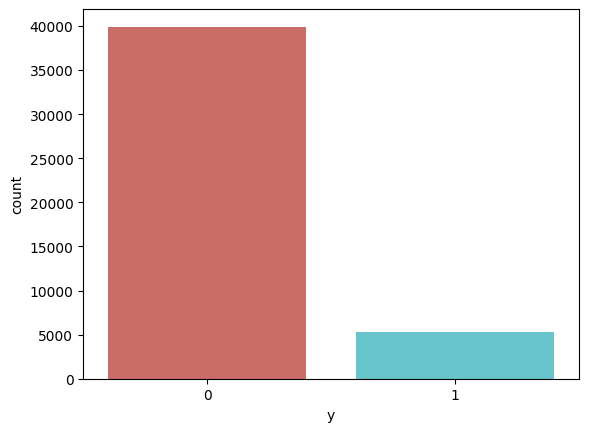

percentage of no is: 88.30151954170445
percentage of yes is: 11.698480458295547


In [9]:
sns.countplot(x='y', data=df, palette='hls')
plt.show()
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no is:", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of yes is:", pct_of_sub*100)

In [10]:
df.groupby('y').mean(numeric_only=True)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,
0,40.838986,0.019112,1303.714969,0.581008,0.169330,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,0.009832,1804.267915,0.365854,0.091511,15.158253,537.294574,2.141047,68.702968,1.170354


In [11]:
df.groupby('job').mean(numeric_only=True)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
job,,,,,,,,,,,
admin.,39.289886,0.014311,1135.838909,0.615355,0.191646,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.044081,0.020654,1078.826654,0.724209,0.173037,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,0.036987,1521.470074,0.584398,0.239408,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,0.017742,1392.395161,0.320968,0.122581,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,0.017340,1763.616832,0.494608,0.132480,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,0.011484,1984.215106,0.216873,0.136484,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.484484,0.020899,1647.970868,0.484484,0.145028,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,0.018055,997.088108,0.665864,0.201252,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,0.003198,1388.060768,0.265458,0.012793,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


In [12]:
df.groupby('marital').mean(numeric_only=True)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
marital,,,,,,,,,,,
divorced,45.782984,0.024582,1178.872287,0.558287,0.176877,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
married,43.408099,0.016462,1425.925590,0.562982,0.171235,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
single,33.703440,0.018686,1301.497654,0.539640,0.130023,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


In [13]:
df.groupby('education').mean(numeric_only=True)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
education,,,,,,,,,,,
primary,45.865567,0.018537,1250.949934,0.568384,0.149467,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,0.019740,1154.880786,0.605034,0.185458,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,0.014886,1758.416435,0.479513,0.134125,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,0.017232,1526.754443,0.441572,0.071621,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


In [14]:
df.groupby('contact').mean(numeric_only=True)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
contact,,,,,,,,,,,
cellular,40.400785,0.017039,1397.926993,0.498651,0.163906,15.930306,263.013966,2.690114,56.885129,0.804064,0.149189
telephone,47.837922,0.009291,1803.704061,0.402615,0.141776,16.557467,235.366139,3.400895,46.312801,0.827254,0.134205
unknown,40.600077,0.022197,1183.550384,0.718664,0.156068,15.360138,252.340476,2.787481,1.299386,0.021966,0.040707


In [15]:
df.groupby('month').mean(numeric_only=True)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
month,,,,,,,,,,,
apr,39.770805,0.003752,1542.551160,0.705662,0.122101,17.317190,298.098909,1.955321,95.201910,1.052524,0.196794
aug,42.894509,0.015527,1427.701777,0.176565,0.096686,16.432688,232.402113,3.927325,13.328958,0.278374,0.110133
dec,44.457944,0.000000,2315.672897,0.191589,0.051402,14.434579,329.327103,2.196262,108.780374,1.803738,0.467290
feb,40.885240,0.013213,1319.098905,0.427331,0.147225,6.354851,248.298226,2.382031,68.702907,1.182710,0.166478
jan,40.493229,0.012830,946.783321,0.371347,0.151105,27.456878,268.220242,1.672131,67.898076,1.185317,0.101212
jul,41.008847,0.031907,900.025526,0.484119,0.305294,18.694271,267.975344,3.524438,8.032342,0.129949,0.090935
jun,42.438120,0.020783,1608.222243,0.416963,0.137427,11.399551,243.087811,3.135368,9.154465,0.197903,0.102228
mar,42.941300,0.000000,2046.228512,0.236897,0.054507,14.134172,244.400419,2.205451,71.228512,1.188679,0.519916
may,38.891109,0.017434,1034.992590,0.877234,0.144777,15.491138,260.922272,2.447552,52.157344,0.584992,0.067195


In [16]:
df.groupby('poutcome').mean(numeric_only=True)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
poutcome,,,,,,,,,,,
failure,40.786166,0.007958,1465.805550,0.708019,0.157927,14.166701,244.185880,1.980820,241.509284,2.896552,0.126097
other,39.752174,0.008696,1487.411413,0.651630,0.144022,14.475000,255.715217,2.461413,229.683696,4.009239,0.166848
success,42.964924,0.001324,1939.301125,0.311714,0.054269,14.449371,316.868961,1.806089,163.259431,3.075447,0.647253
unknown,40.932114,0.020509,1318.722043,0.540870,0.165670,16.145621,257.738332,2.921886,-0.962039,0.000460,0.091615


Text(0, 0.5, 'Frequency of Purchase')

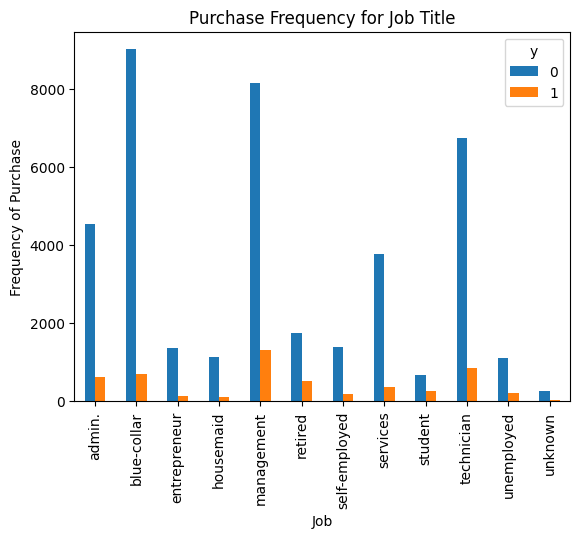

In [17]:
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')

Text(0, 0.5, 'Proportion of Customers')

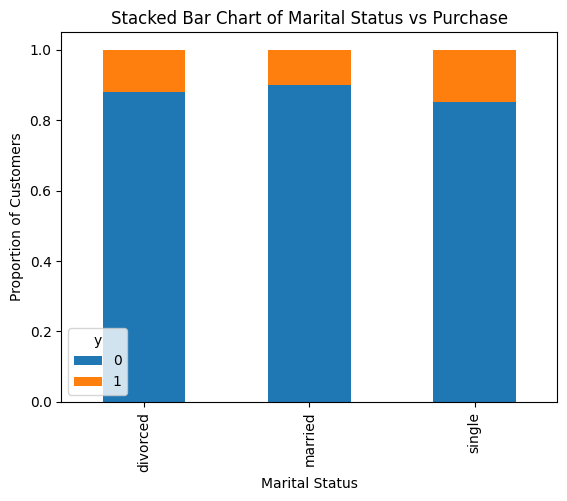

In [18]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
#plt.savefig('marital_vs_pur_stack')

Text(0, 0.5, 'Proportion of Customers')

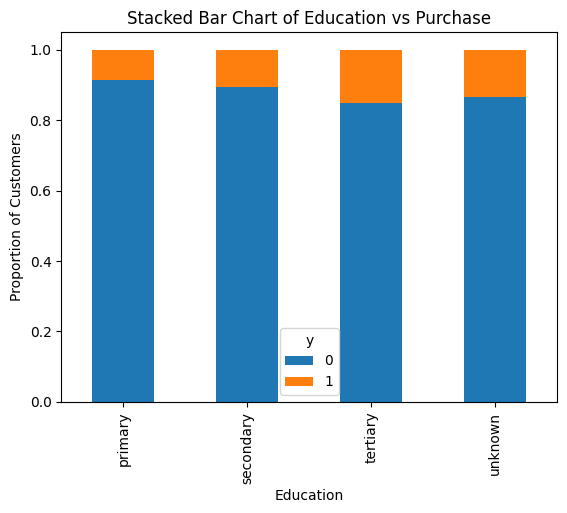

In [19]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
#plt.savefig('edu_vs_pur_stack')

Text(0, 0.5, 'Frequency of Purchase')

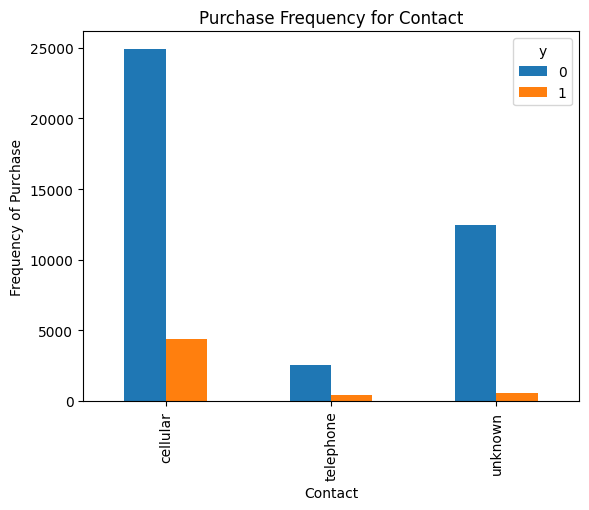

In [20]:
pd.crosstab(df.contact,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Contact')
plt.xlabel('Contact')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_contact_bar')

Text(0, 0.5, 'Frequency of Purchase')

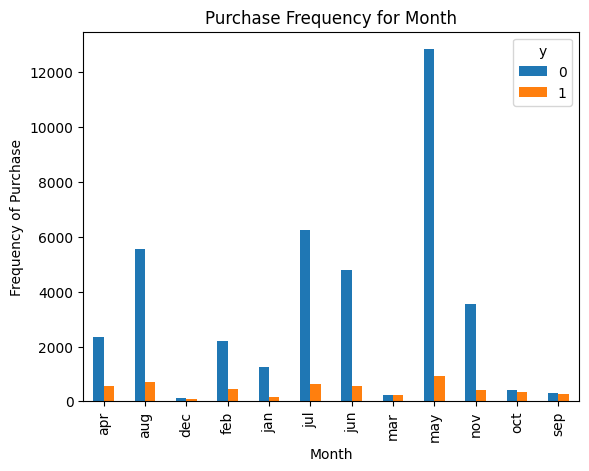

In [21]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_fre_month_bar')

Text(0, 0.5, 'Frequency')

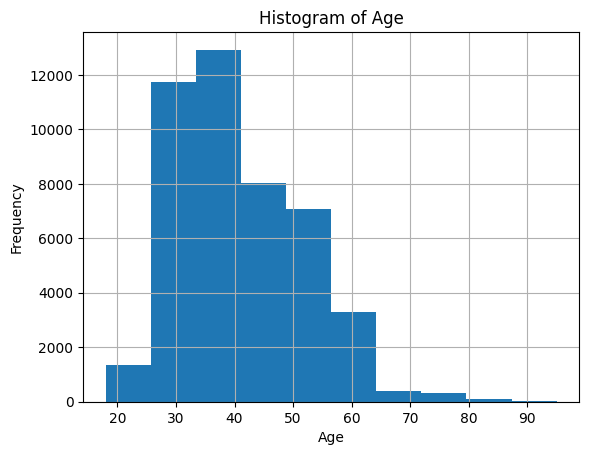

In [22]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('hist_age')

Text(0, 0.5, 'Frequency of Purchase')

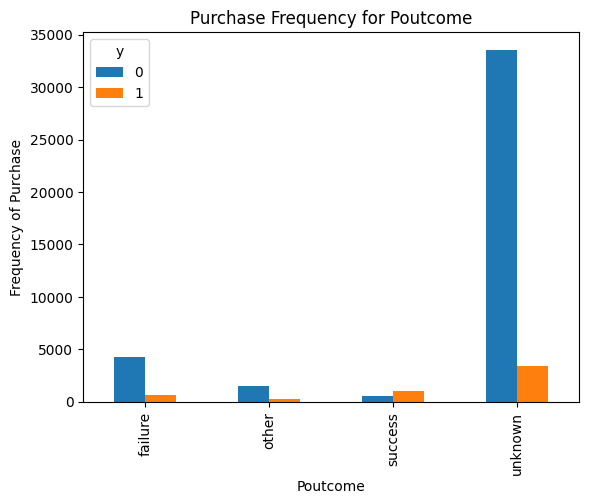

In [23]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_fre_pout_bar')

### Create Dummy Variables

In [24]:
# These columns contains values of type object
# Values of each column are Nominal
cols_vars=['job','marital','education','contact','month','poutcome']
for var in cols_vars:
    new_cols='var'+'_'+var
    new_cols=pd.get_dummies(df[var], prefix=var)
    df1=df.join(new_cols) # Don't do it more than once
    df=df1

df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cols_vars] # Delete cols_vars in columns

df_final=df[to_keep]
df_final.columns.values # The current columns any column with prefix is a dummy variable

array(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [39]:
df_final.info()
#print(df_final.head())
df_final.to_csv('new_bank.csv', sep='\t', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [57]:
# X represent the independent variables
# y represent the dependent varibale 'y'
df_temp = df_final
y = df_final['y']
X = df_temp.drop(['y'], axis=1)
print(df_final.shape)
print(X.shape)
print(y.shape)

(45211, 49)
(45211, 48)
(45211,)
Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


### Scaling Dataset Independent Variables (IVs)

(45211, 49)
(45211, 48)
(45211,)
45211
24.928057865050523


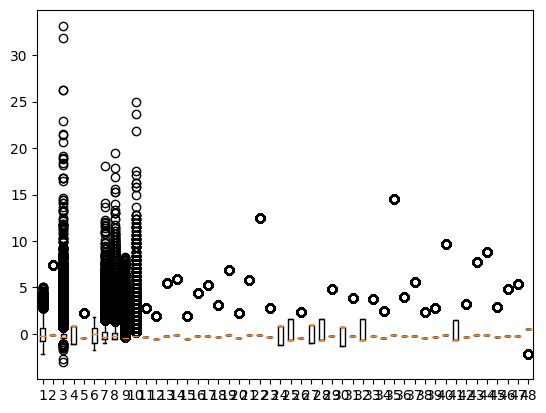

In [26]:
# Scaling Dataset Independent Variables
# Standardizing
# Dealing with the Outliers
scalingObj= StandardScaler()
array_scaled=scalingObj.fit_transform(X)
#print(array_scaled)
rowsToKeep = array_scaled[:,9] <30
print(len(rowsToKeep))
array_scaled = array_scaled[rowsToKeep]
y = y[rowsToKeep]
print(max(array_scaled[:,9]))
plt.boxplot(array_scaled)
plt.show()

### Feature Selection
Failed to do the feature selection using RFECV at this stage, execution time was too long to get the result.

In [27]:
# Feature Selection
#from sklearn.feature_selection import RFECV
#from sklearn.ensemble import RandomForestClassifier

#rfc = RandomForestClassifier()

#select = RFECV(estimator=rfc, cv=10)
#select = select.fit(array_scaled,y)
 
#print("Feature ranking: ", select.ranking_)


### Dimensionality Reduction 
Principal Component Analysis (PCA)

In [28]:
# Using DecisionTreeClassifier to classify features
clf= tree.DecisionTreeClassifier()
scores = model_selection.cross_val_score(clf, array_scaled, y, cv=10)
print('Original Accuracy', np.mean(scores))

pca = decomposition.PCA(n_components = 20)# Principal Component Analysis
principalComponents = pca.fit_transform(array_scaled)
#print(type(principalComponents))
print('Explained Variance:', np.sum(pca.explained_variance_ratio_))

clf = tree.DecisionTreeClassifier()
scores=model_selection.cross_val_score(clf, principalComponents, y, cv=10)
print('Accuracy after PCA:', np.mean(scores))

Original Accuracy 0.635633709356337
Explained Variance: 0.6520661959371196
Accuracy after PCA: 0.6889626188896261


In [29]:
df_columns=['pc'+str(i+1) for i in range(20)]
df_principal = pd.DataFrame(data = principalComponents
             , columns = df_columns)

In [30]:
df_pc_final = pd.concat([df_principal, df_final[['y']]], axis = 1)
df_pc_final.to_csv('pc_bank.csv', sep='\t', encoding='utf-8')

## Build Model
### Split Dataset to Training and Test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_principal, y, test_size=0.2, random_state=0)
print("Training IV shape: ",X_train.shape) # Independent Variable
print("Training DV shape: ", y_train.shape) # Dependent Variable
print("Test IV shape: ", X_test.shape)
print("Test DV shape: ", y_test.shape)

Training IV shape:  (36168, 20)
Training DV shape:  (36168,)
Test IV shape:  (9042, 20)
Test DV shape:  (9042,)


### Training Data with Logistical Regression Model

In [111]:
reg_Log = LogisticRegression()
reg_Log.fit(X_train, y_train)
y_pred = reg_Log.predict(X_test)
print('Accuracy: {:.4f}'.format(reg_Log.score(X_test, y_test)))

Accuracy: 0.8905


### Evaluation Training Result with Confusion Matrix

In [92]:
#from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7786  183]
 [ 807  266]]


In [91]:
#from sklearn.metrics import classification_report
# The evaluation after PCA
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7969
           1       0.59      0.25      0.35      1073

    accuracy                           0.89      9042
   macro avg       0.75      0.61      0.64      9042
weighted avg       0.87      0.89      0.87      9042



### Build Logistical Regression Model on Training Set before PCA

In [110]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.2, random_state=0)
print("Training IV shape: ",X_train_LR.shape) # Independent Variable
print("Training DV shape: ", y_train_LR.shape) # Dependent Variable
print("Test IV shape: ", X_test_LR.shape)
print("Test DV shape: ", y_test_LR.shape)
reg = LogisticRegression()
reg.fit(X_train_LR, y_train_LR)
y_pred_LR = reg.predict(X_test_LR)
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test_LR, y_pred_LR)))

Training IV shape:  (36168, 48)
Training DV shape:  (36168,)
Test IV shape:  (9043, 48)
Test DV shape:  (9043,)
Accuracy: 0.8985


In [114]:
# The evaluation before PCA
print(classification_report(y_test_LR, y_pred_LR))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



### Create Receiver operating characteristic (ROC) Plot

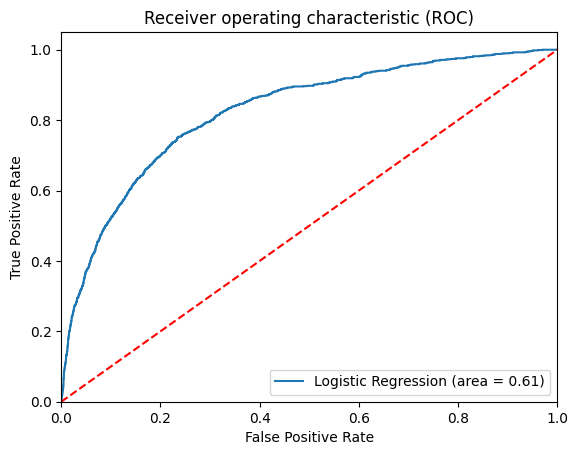

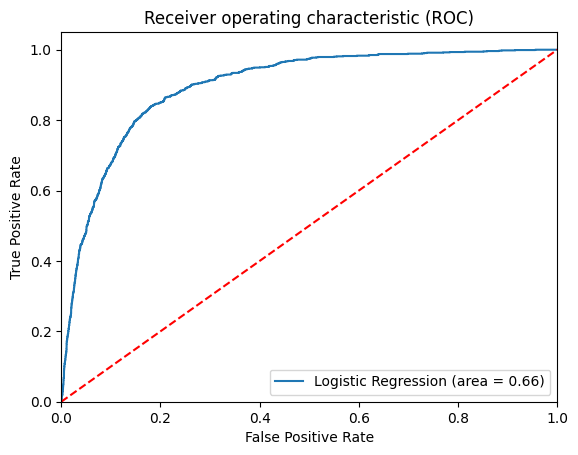

In [100]:
def roc(y_test, model, X_test):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
roc(y_test, reg_Log, X_test)
roc(y_test_LR, reg, X_test_LR)

### Build Decision Tree Model

In [109]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X, y, test_size=0.2, random_state=0)
print("Training IV shape: ",X_train_DT.shape) # Independent Variable
print("Training DV shape: ", y_train_DT.shape) # Dependent Variable
print("Test IV shape: ", X_test_DT.shape)
print("Test DV shape: ", y_test_DT.shape)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_DT,y_train_DT)
y_pred_DT = clf.predict(X_test_DT)
print("Accuracy:  {:.4f}".format(metrics.accuracy_score(y_test_DT, y_pred_DT)))

Training IV shape:  (36168, 48)
Training DV shape:  (36168,)
Test IV shape:  (9043, 48)
Test DV shape:  (9043,)
Accuracy:  0.8707


In [108]:
clf_opt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_opt = clf.fit(X_train_DT,y_train_DT)
y_pred_opt = clf_opt.predict(X_test_DT)
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test_DT, y_pred_opt)))

Accuracy: 0.8715


In [101]:
# The evaluation of Decision Tree Classifier
print(classification_report(y_test_DT, y_pred_DT))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7980
           1       0.45      0.48      0.47      1063

    accuracy                           0.87      9043
   macro avg       0.69      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



### Build K-Nearest Neighbors (KNN) Model

In [78]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

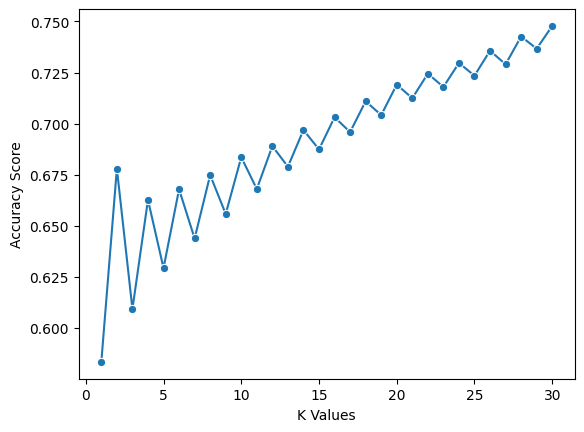

In [79]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [113]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X, y, test_size=0.2, random_state=0)
print("Training IV shape: ",X_train_KNN.shape) # Independent Variable
print("Training DV shape: ", y_train_KNN.shape) # Dependent Variable
print("Test IV shape: ", X_test_KNN.shape)
print("Test DV shape: ", y_test_KNN.shape)

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train_KNN, y_train_KNN)
y_pred_KNN = knn.predict(X_test_KNN)
accuracy = metrics.accuracy_score(y_test_KNN, y_pred_KNN)
#precision = metrics.precision_score(y_test_KNN, y_pred_KNN)
#recall = metrics.recall_score(y_test_KNN, y_pred_KNN)
print('Accuracy: {:.4f}'.format(accuracy))
#print('Precision: {:.4f}'.format(precision))
#print('Recall: {:.4f}'.format(recall))

Training IV shape:  (36168, 48)
Training DV shape:  (36168,)
Test IV shape:  (9043, 48)
Test DV shape:  (9043,)
Accuracy: 0.8916


In [85]:
# The evaluation of KNN model
print(classification_report(y_test_KNN, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.61      0.22      0.32      1063

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043

